
Eğitim Maliyeti 1595.1912859379786 | Test Maliyeti 2260.194545987635
Eğitim MAE 34.734527173292165 | Test MAE  34.315502495200185
Eğitim SSE 1276153.0287503828 | Test SSE  452038.90919752704


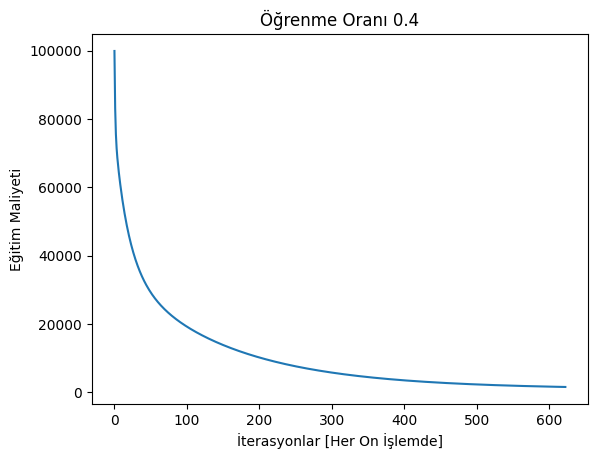

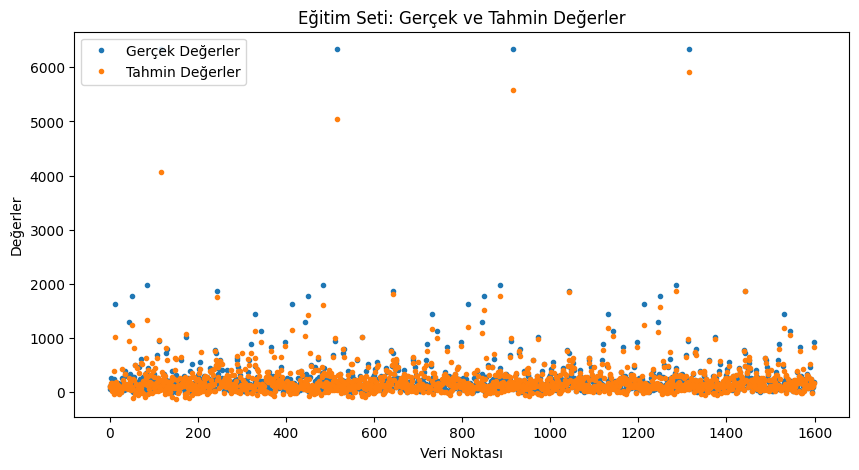

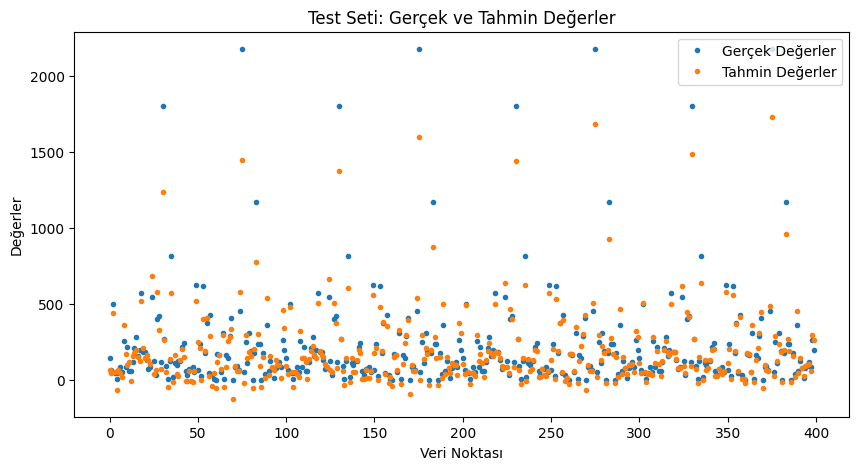

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LineerRegresyonModeli:
    def __init__(self, X_train, y_train, X_val, y_val, ogrenme_orani, epoch_sayisi):
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.ogrenme_orani = ogrenme_orani
        self.epoch_sayisi = epoch_sayisi
        self.w, self.b = self.parametreleri_baslat(X_train.shape[0])
        self.egitim_maliyetleri = []
        self.egitim_gercek_degerler = []
        self.egitim_tahmin_degerler = []
        self.test_gercek_degerler = []
        self.test_tahmin_degerler = []

    def parametreleri_baslat(self, lenw):
        w = np.random.randn(lenw)
        b = 0
        return w, b

    def ileri_yayilim(self, X, w, b):
        z = np.dot(w, X) + b
        return z

    def maliyet_fonksiyonu(self, z, y):
        m = y.shape[1]
        J = (1 / (2 * m)) * np.sum(np.square(z - y))
        return J

    def geriye_yayilim(self, X, y, z):
        m = y.shape[1]
        dz = (1 / m) * (z - y)
        dw = np.dot(dz, X.T)
        db = np.sum(dz)
        return dw, db

    def gradient_inis_guncelle(self, dw, db):
        self.w = self.w - self.ogrenme_orani * dw
        self.b = self.b - self.ogrenme_orani * db

    def egitim(self):
        m_egitim = self.y_train.shape[1]
        m_val = self.y_val.shape[1]

        for i in range(1, self.epoch_sayisi + 1):
            z_train = self.ileri_yayilim(self.X_train, self.w, self.b)
            cost_train = self.maliyet_fonksiyonu(z_train, self.y_train)
            dw, db = self.geriye_yayilim(self.X_train, self.y_train, z_train)
            self.gradient_inis_guncelle(dw, db)
            
           
            self.egitim_maliyetleri.append(cost_train)
            if i % 150 == 0:
                self.egitim_gercek_degerler.append(self.y_train)
                self.egitim_tahmin_degerler.append(z_train)
                
            MAE_train = (1 / m_egitim) * np.sum(np.abs(z_train - self.y_train))
            SSE_train = np.sum((z_train - self.y_train)**2)

            z_val = self.ileri_yayilim(self.X_val, self.w, self.b)
            cost_val = self.maliyet_fonksiyonu(z_val, self.y_val)
            MAE_val = (1 / m_val) * np.sum(np.abs(z_val - self.y_val))
            SSE_val = np.sum((z_val - self.y_val)**2)

            
            if i % 150 == 0:
                self.test_gercek_degerler.append(self.y_val)
                self.test_tahmin_degerler.append(z_val)
            
            #print('Eğitim Maliyeti ' + str(cost_train) + ' | ' + 'Test Maliyeti ' + str(cost_val))
            #print('Eğitim MAE ' + str(MAE_train) + ' | ' + 'Test MAE  ' + str(MAE_val))
            #print('Eğitim SSE ' + str(SSE_train) + ' | ' + 'Test SSE  ' + str(SSE_val))
            #print()

        print("")
        print('Eğitim Maliyeti ' + str(cost_train) + ' | ' + 'Test Maliyeti ' + str(cost_val))
        print('Eğitim MAE ' + str(MAE_train) + ' | ' + 'Test MAE  ' + str(MAE_val))
        print('Eğitim SSE ' + str(SSE_train) + ' | ' + 'Test SSE  ' + str(SSE_val))


        # Eğitim maliyetini grafik üzerinde göster
        plt.plot(self.egitim_maliyetleri)
        plt.xlabel('İterasyonlar [Her On İşlemde]')
        plt.ylabel('Eğitim Maliyeti')
        plt.title('Öğrenme Oranı ' + str(self.ogrenme_orani))
        plt.show()
        
        
        # Gerçek ve Tahmin değerlerini göster
        self.plotGraph(self.egitim_gercek_degerler, self.egitim_tahmin_degerler, 'Eğitim Seti')
        self.plotGraph(self.test_gercek_degerler, self.test_tahmin_degerler, 'Test Seti')

    def plotGraph(self, gercek_degerler, tahmin_degerler, set_tipi):
        plt.figure(figsize=(10, 5))
        plt.plot(np.array(gercek_degerler).flatten(), label='Gerçek Değerler', marker='.', linestyle=' ')
        plt.plot(np.array(tahmin_degerler).flatten(), label='Tahmin Değerler', marker='.', linestyle=' ')
        plt.legend()
        plt.xlabel('Veri Noktası')
        plt.ylabel('Değerler')
        plt.title(f'{set_tipi}: Gerçek ve Tahmin Değerler')
        plt.show()


def main():
    dataset = pd.read_csv('dataset_Facebook.csv', delimiter=';')
    data = dataset.copy()
    #data.info()
    mean_value = data['Paid'].mean()
    data['Paid'].fillna(mean_value, inplace=True)

    mean_value = data['like'].mean()
    data['like'].fillna(mean_value, inplace=True)

    mean_value = data['share'].mean()
    data['share'].fillna(mean_value, inplace=True)
    
    #data.info()
    
    X = data[['Category','Page total likes', 'Post Month', 'Post Hour', 'Post Weekday', 'Paid']].values
    y = data['Total Interactions'].values

    data.drop(["Type"], axis=1, inplace=True)
    
    X = (data - data.mean()) / (data.max() - data.min())

    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

    X_train = X_train.T
    y_train = np.array([y_train])
    X_val = X_val.T
    y_val = np.array([y_val])

    model = LineerRegresyonModeli(X_train, y_train, X_val, y_val, 0.4, 623)
    model.egitim()


if __name__ == "__main__":
    main()



Eğitim Maliyeti 654.4047364582101 | Test Maliyeti 1261.20208603543
Eğitim MAE 22.449579722083353 | Test MAE  25.082558761537115
Eğitim SSE 523523.789166568 | Test SSE  252240.417207086


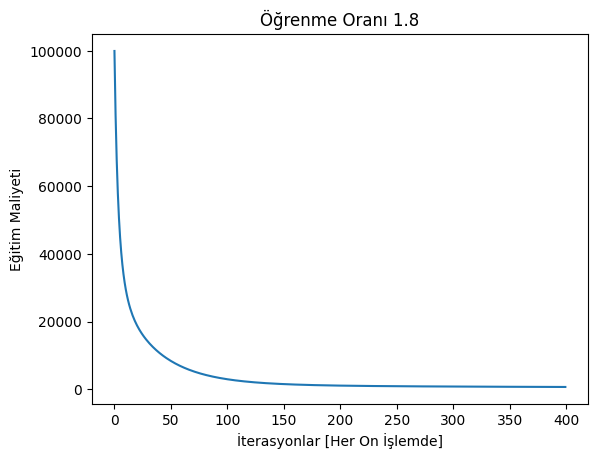

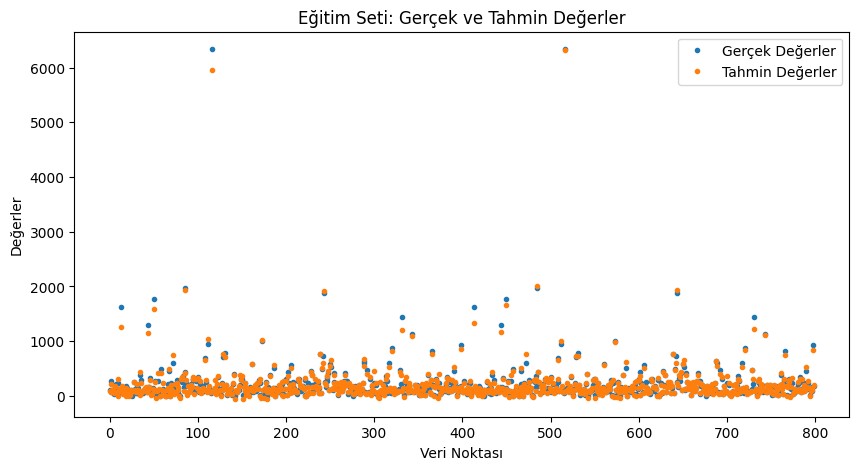

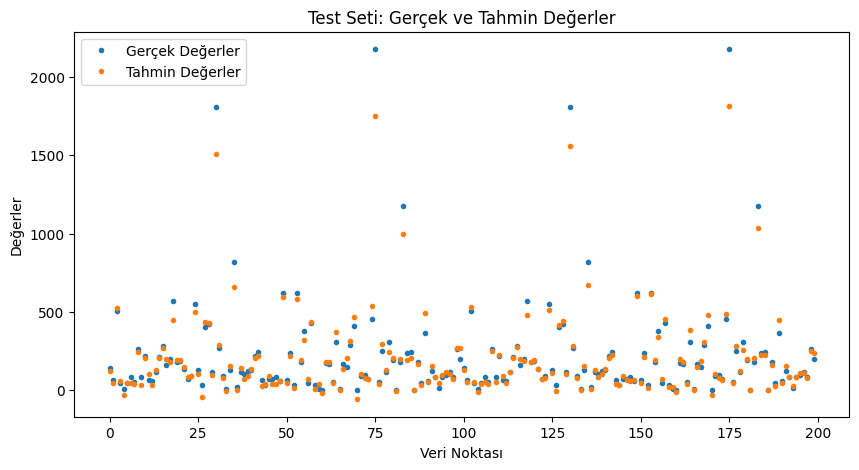

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LineerRegresyonModeli:
    def __init__(self, X_train, y_train, X_val, y_val, ogrenme_orani, epoch_sayisi):
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.ogrenme_orani = ogrenme_orani
        self.epoch_sayisi = epoch_sayisi
        self.w, self.b = self.parametreleri_baslat(X_train.shape[0])
        self.egitim_maliyetleri = []
        self.egitim_gercek_degerler = []
        self.egitim_tahmin_degerler = []
        self.test_gercek_degerler = []
        self.test_tahmin_degerler = []

    def parametreleri_baslat(self, lenw):
        w = np.random.randn(lenw)
        b = 0
        return w, b

    def ileri_yayilim(self, X, w, b):
        z = np.dot(w, X) + b
        return z

    def maliyet_fonksiyonu(self, z, y):
        m = y.shape[1]
        J = (1 / (2 * m)) * np.sum(np.square(z - y))
        return J

    def geriye_yayilim(self, X, y, z):
        m = y.shape[1]
        dz = (1 / m) * (z - y)
        dw = np.dot(dz, X.T)
        db = np.sum(dz)
        return dw, db

    def gradient_inis_guncelle(self, dw, db):
        self.w = self.w - self.ogrenme_orani * dw
        self.b = self.b - self.ogrenme_orani * db

    def egitim(self):
        m_egitim = self.y_train.shape[1]
        m_val = self.y_val.shape[1]

        for i in range(1, self.epoch_sayisi + 1):
            z_train = self.ileri_yayilim(self.X_train, self.w, self.b)
            cost_train = self.maliyet_fonksiyonu(z_train, self.y_train)
            dw, db = self.geriye_yayilim(self.X_train, self.y_train, z_train)
            self.gradient_inis_guncelle(dw, db)
            
           
            self.egitim_maliyetleri.append(cost_train)
            if i % 150 == 0:
                self.egitim_gercek_degerler.append(self.y_train)
                self.egitim_tahmin_degerler.append(z_train)
                
            MAE_train = (1 / m_egitim) * np.sum(np.abs(z_train - self.y_train))
            SSE_train = np.sum((z_train - self.y_train)**2)

            z_val = self.ileri_yayilim(self.X_val, self.w, self.b)
            cost_val = self.maliyet_fonksiyonu(z_val, self.y_val)
            MAE_val = (1 / m_val) * np.sum(np.abs(z_val - self.y_val))
            SSE_val = np.sum((z_val - self.y_val)**2)

            
            if i % 150 == 0:
                self.test_gercek_degerler.append(self.y_val)
                self.test_tahmin_degerler.append(z_val)
            
            #print('Eğitim Maliyeti ' + str(cost_train) + ' | ' + 'Test Maliyeti ' + str(cost_val))
            #print('Eğitim MAE ' + str(MAE_train) + ' | ' + 'Test MAE  ' + str(MAE_val))
            #print('Eğitim SSE ' + str(SSE_train) + ' | ' + 'Test SSE  ' + str(SSE_val))
            #print()

        print("")
        print('Eğitim Maliyeti ' + str(cost_train) + ' | ' + 'Test Maliyeti ' + str(cost_val))
        print('Eğitim MAE ' + str(MAE_train) + ' | ' + 'Test MAE  ' + str(MAE_val))
        print('Eğitim SSE ' + str(SSE_train) + ' | ' + 'Test SSE  ' + str(SSE_val))


        # Eğitim maliyetini grafik üzerinde göster
        plt.plot(self.egitim_maliyetleri)
        plt.xlabel('İterasyonlar [Her On İşlemde]')
        plt.ylabel('Eğitim Maliyeti')
        plt.title('Öğrenme Oranı ' + str(self.ogrenme_orani))
        plt.show()
        
        
        # Gerçek ve Tahmin değerlerini göster
        self.plotGraph(self.egitim_gercek_degerler, self.egitim_tahmin_degerler, 'Eğitim Seti')
        self.plotGraph(self.test_gercek_degerler, self.test_tahmin_degerler, 'Test Seti')

    def plotGraph(self, gercek_degerler, tahmin_degerler, set_tipi):
        plt.figure(figsize=(10, 5))
        plt.plot(np.array(gercek_degerler).flatten(), label='Gerçek Değerler', marker='.', linestyle=' ')
        plt.plot(np.array(tahmin_degerler).flatten(), label='Tahmin Değerler', marker='.', linestyle=' ')
        plt.legend()
        plt.xlabel('Veri Noktası')
        plt.ylabel('Değerler')
        plt.title(f'{set_tipi}: Gerçek ve Tahmin Değerler')
        plt.show()


def main():
    dataset = pd.read_csv('dataset_Facebook.csv', delimiter=';')
    data = dataset.copy()
    #data.info()
    mean_value = data['Paid'].mean()
    data['Paid'].fillna(mean_value, inplace=True)

    mean_value = data['like'].mean()
    data['like'].fillna(mean_value, inplace=True)

    mean_value = data['share'].mean()
    data['share'].fillna(mean_value, inplace=True)

    one_hot_encoded = pd.get_dummies(data['Type'], prefix='Type')
    data = pd.concat([data, one_hot_encoded], axis=1)

    data['Type_Link'] = data['Type_Link'].astype(int)
    data['Type_Photo'] = data['Type_Photo'].astype(int)
    data['Type_Status'] = data['Type_Status'].astype(int)
    data['Type_Video'] = data['Type_Video'].astype(int)

    data.drop(["Type"], axis=1, inplace=True)
    X = data[['Type_Video','Type_Photo', 'Type_Link', 'Category', 'Paid']].values
    y = data['Total Interactions'].values
 
    
    X = (data - data.mean()) / (data.max() - data.min())

    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

    X_train = X_train.T
    y_train = np.array([y_train])
    X_val = X_val.T
    y_val = np.array([y_val])

    model = LineerRegresyonModeli(X_train, y_train, X_val, y_val, 1.8 ,400)
    model.egitim()


if __name__ == "__main__":
    main()


Eğitim Maliyeti 0.002484760412309758 | Test Maliyeti 0.003200543509701699
Eğitim MAE 0.034009815558129035 | Test MAE  0.035550297309840925
Eğitim SSE 1.9878083298478062 | Test SSE  0.6401087019403398


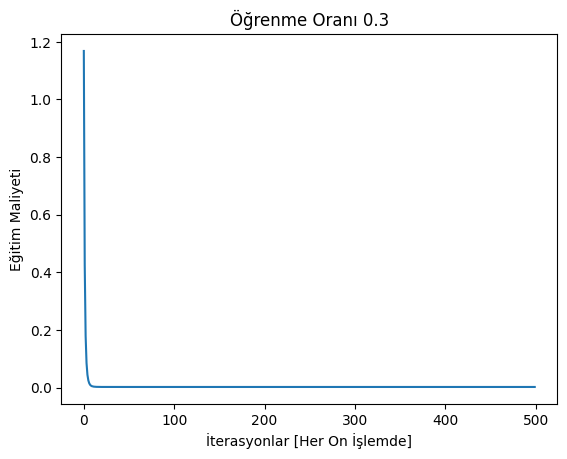

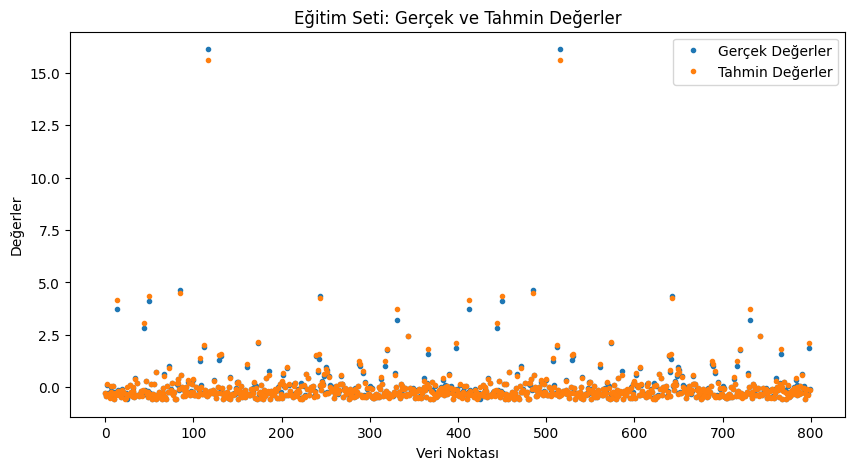

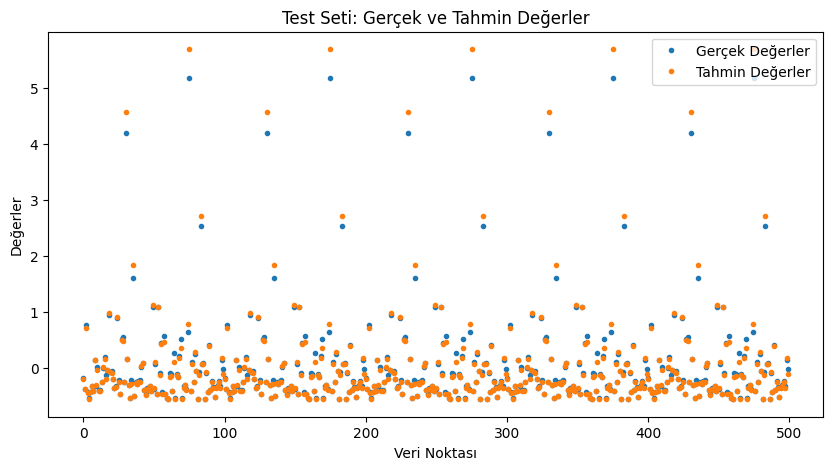

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

class LineerRegresyonModeli:
    def __init__(self, X_train, y_train, X_val, y_val, ogrenme_orani, epoch_sayisi):
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.ogrenme_orani = ogrenme_orani
        self.epoch_sayisi = epoch_sayisi
        self.w, self.b = self.parametreleri_baslat(X_train.shape[0])
        self.egitim_maliyetleri = []
        self.egitim_gercek_degerler = []
        self.egitim_tahmin_degerler = []
        self.test_gercek_degerler = []
        self.test_tahmin_degerler = []

    def parametreleri_baslat(self, lenw):
        w = np.random.randn(lenw)
        b = 0
        return w, b

    def ileri_yayilim(self, X, w, b):
        z = np.dot(w, X) + b
        return z

    def maliyet_fonksiyonu(self, z, y):
        m = y.shape[1]
        J = (1 / (2 * m)) * np.sum(np.square(z - y))
        return J

    def geriye_yayilim(self, X, y, z):
        m = y.shape[1]
        dz = (1 / m) * (z - y)
        dw = np.dot(dz, X.T)
        db = np.sum(dz)
        return dw, db

    def gradient_inis_guncelle(self, dw, db):
        self.w = self.w - self.ogrenme_orani * dw
        self.b = self.b - self.ogrenme_orani * db

    def egitim(self):
        m_egitim = self.y_train.shape[1]
        m_val = self.y_val.shape[1]

        for i in range(1, self.epoch_sayisi + 1):
            z_train = self.ileri_yayilim(self.X_train, self.w, self.b)
            cost_train = self.maliyet_fonksiyonu(z_train, self.y_train)
            dw, db = self.geriye_yayilim(self.X_train, self.y_train, z_train)
            self.gradient_inis_guncelle(dw, db)
            
            self.egitim_maliyetleri.append(cost_train)
            if i % 250 == 0:
                self.egitim_gercek_degerler.append(self.y_train)
                self.egitim_tahmin_degerler.append(z_train)
                
            MAE_train = (1 / m_egitim) * np.sum(np.abs(z_train - self.y_train))
            SSE_train = np.sum((z_train - self.y_train)**2)

            z_val = self.ileri_yayilim(self.X_val, self.w, self.b)
            cost_val = self.maliyet_fonksiyonu(z_val, self.y_val)
            MAE_val = (1 / m_val) * np.sum(np.abs(z_val - self.y_val))
            SSE_val = np.sum((z_val - self.y_val)**2)

            if i % 100 == 0:
                self.test_gercek_degerler.append(self.y_val)
                self.test_tahmin_degerler.append(z_val)
            
            #print("")
            #print('Eğitim Maliyeti ' + str(cost_train) + ' | ' + 'Test Maliyeti ' + str(cost_val))
            #print('Eğitim MAE ' + str(MAE_train) + ' | ' + 'Test MAE  ' + str(MAE_val))
            #print('Eğitim SSE ' + str(SSE_train) + ' | ' + 'Test SSE  ' + str(SSE_val))
        
         
        print('Eğitim Maliyeti ' + str(cost_train) + ' | ' + 'Test Maliyeti ' + str(cost_val))
        print('Eğitim MAE ' + str(MAE_train) + ' | ' + 'Test MAE  ' + str(MAE_val))
        print('Eğitim SSE ' + str(SSE_train) + ' | ' + 'Test SSE  ' + str(SSE_val))
        # Eğitim maliyetini grafik üzerinde göster
        plt.plot(self.egitim_maliyetleri)
        plt.xlabel('İterasyonlar [Her On İşlemde]')
        plt.ylabel('Eğitim Maliyeti')
        plt.title('Öğrenme Oranı ' + str(self.ogrenme_orani))
        plt.show()
        
        # Gerçek ve Tahmin değerlerini göster
        self.plotGraph(self.egitim_gercek_degerler, self.egitim_tahmin_degerler, 'Eğitim Seti')
        self.plotGraph(self.test_gercek_degerler, self.test_tahmin_degerler, 'Test Seti')

    def plotGraph(self, gercek_degerler, tahmin_degerler, set_tipi):
        plt.figure(figsize=(10, 5))
        plt.plot(np.array(gercek_degerler).flatten(), label='Gerçek Değerler', marker='.', linestyle=' ')
        plt.plot(np.array(tahmin_degerler).flatten(), label='Tahmin Değerler', marker='.', linestyle=' ')
        plt.legend()
        plt.xlabel('Veri Noktası')
        plt.ylabel('Değerler')
        plt.title(f'{set_tipi}: Gerçek ve Tahmin Değerler')
        plt.show()


def main():
    dataset = pd.read_csv('dataset_Facebook.csv', delimiter=';')
    data = dataset.copy()
    
    mean_value = data['Paid'].mean()
    data['Paid'].fillna(mean_value, inplace=True)

    mean_value = data['like'].mean()
    data['like'].fillna(mean_value, inplace=True)

    mean_value = data['share'].mean()
    data['share'].fillna(mean_value, inplace=True)

    one_hot_encoded = pd.get_dummies(data['Type'], prefix='Type')
    data = pd.concat([data, one_hot_encoded], axis=1)

    data['Type_Link'] = data['Type_Link'].astype(int)
    data['Type_Photo'] = data['Type_Photo'].astype(int)
    data['Type_Status'] = data['Type_Status'].astype(int)
    data['Type_Video'] = data['Type_Video'].astype(int)

    data.drop(["Type"], axis=1, inplace=True)
    X = data[['Type_Video','Type_Photo', 'Type_Link', 'Category', 'Paid','like']].values
    y = data['Total Interactions'].values

    # Veriyi normalize et
    scaler_X = StandardScaler()
    X_normalized = scaler_X.fit_transform(X)
    
    scaler_y = StandardScaler()
    y_normalized = scaler_y.fit_transform(y.reshape(-1, 1))

    X_train, X_val, y_train, y_val = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=5)

    X_train = X_train.T
    y_train = y_train.T  # Transpozunu al
    X_val = X_val.T
    y_val = y_val.T  # Transpozunu al

    model = LineerRegresyonModeli(X_train, y_train, X_val, y_val, 0.3, 500)
    model.egitim()


if __name__ == "__main__":
    main()
